# Alpine monatliche Niederschlagsdaten

Alpine monatliche Niederschlagsdaten seit 1871, abgeleitet aus stationären Beobachtungen

Der LAPrec-Datensatz (Long-term Alpine Precipitation Reconstruction) bietet monatliche Niederschlagsdaten für die Alpenregion und basiert auf stationären Beobachtungen. Es gibt zwei Versionen:

- LAPrec1871 (ab 1871, 85 Eingabereihen)
- LAPrec1901 (ab 1901, 165 Eingabereihen)
  
Der Datensatz erfüllt hohe klimatische Standards und ist eine wertvolle Grundlage für historische Klimaanalysen in den Alpen, einer Region, die stark vom Klimawandel betroffen ist. Es kombiniert die Datenquellen HISTALP (homogenisierte stationäre Niederschlagsdaten) und APGD (tägliche Rasterdaten von 1971–2008) und nutzt die Methode der Reduced Space Optimal Interpolation (RSOI).

LAPrec wird alle zwei Jahre aktualisiert und wurde im Rahmen des Copernicus Climate Change Service in Zusammenarbeit mit den Wetterdiensten von Schweiz (MeteoSwiss) und Österreich (ZAMG) entwickelt.

**Informationen zum Datensatz:**
* Source: [Alpine Monthly Precipitation](https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-alpine-precipitation?tab=overview)
* Author: T. Tewes (City of Konstanz)
* Notebook Version: 1.1 (Updated: December 05, 2024)

Zitieren: Copernicus Climate Change Service, Climate Data Store, (2021): Alpine gridded monthly precipitation data since 1871 derived from in-situ observations. Copernicus Climate Change Service (C3S) Climate Data Store (CDS). DOI: 10.24381/cds.6a6d1bc3 (Accessed on DD-MMM-YYYY)

## 1. Specifying the paths and working directories

In [23]:
import os

''' ---- Hier die Verzeichnisse angeben ---- '''
download_folder = r".\data\alpine-monthly-precipitation\download"
working_folder = r".\data\alpine-monthly-precipitation\working"
geotiff_folder = r".\data\alpine-monthly-precipitation\geotiff"
csv_folder = r".\data\alpine-monthly-precipitation\csv"
output_folder = r".\data\alpine-monthly-precipitation\output"
''' ----- Ende der Eingaben ---- '''

os.makedirs(download_folder, exist_ok=True)
os.makedirs(working_folder, exist_ok=True)
os.makedirs(geotiff_folder, exist_ok=True)
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

## 2. Download and Extract Dataset

### 2.1 Authentication

In [24]:
import cdsapi

def main():
    api_key = "fdae60fd-35d4-436f-825c-c63fedab94a4"
    api_url = "https://cds.climate.copernicus.eu/api"
    client = cdsapi.Client(url=api_url, key=api_key)
    return client

### 2.2 Request Definition and Download

In [25]:
dataset = "insitu-gridded-observations-alpine-precipitation"
request = {
    "variable": "precipitation",
    "dataset_issue": [
        "laprec1871",
        "laprec1901"
    ],
    "version": ["1_2"],
}

In [26]:
# Uncomment and run this cell to download the dataset:

def main_retrieve():
    dataset_filename = f"{dataset}.zip"
    dataset_filepath = os.path.join(download_folder, dataset_filename)

    # Download the dataset only if the dataset has not been downloaded before
    if not os.path.isfile(dataset_filepath):
        # Download the dataset with the defined request parameters
        client.retrieve(dataset, request, dataset_filepath)
    else:
        print("Dataset already downloaded.")

if __name__ == "__main__":
    client = main()
    main_retrieve()

2024-12-09 13:47:21,242 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-12-09 13:47:21,244 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-12-09 13:47:21,245 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-12-09 13:47:21,247 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

Dataset already downloaded.


### 2.3 Extract Zip folder

In [27]:
import zipfile

dataset_filename = f"{dataset}.zip"
dataset_filepath = os.path.join(download_folder, dataset_filename)
extract_folder = working_folder

# Extract the zip file
try:
    os.makedirs(extract_folder, exist_ok=True)
    
    if not os.listdir(extract_folder):
        with zipfile.ZipFile(dataset_filepath, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
            print(f"Successfully extracted files to: {extract_folder}")
    else:
        print("Folder is not empty. Skipping extraction.")
except FileNotFoundError:
    print(f"Error: The file {dataset_filepath} was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file {dataset_filepath} is not a valid zip file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Folder is not empty. Skipping extraction.


## 3. Read netCDF file using netCDF4

In [28]:
import netCDF4 as nc

# Open the NetCDF file in read mode
nc_filepath = os.path.join(extract_folder, os.listdir(extract_folder)[0])
dataset = nc.Dataset(nc_filepath, mode='r')

# List all variables in the dataset
variables_list = dataset.variables.keys()
print(f"Available variables: {list(variables_list)}")

Available variables: ['X', 'Y', 'time', 'LAPrec1871', 'lon', 'lat', 'dem', 'lambert_azimuthal_equal_area']


In [29]:
import pandas as pd

test_variable = 'LAPrec1871'
variable_data = dataset[test_variable]

# Generate summary of the primary variable
summary = {
    "Variable Name": test_variable,
    "Data Type": variable_data.dtype,
    "Shape": variable_data.shape,
    "Variable Info": f"{test_variable}({', '.join(variable_data.dimensions)})",
    "Units": getattr(variable_data, "units", "N/A"),
    "Long Name": getattr(variable_data, "long_name", "N/A"),
}

# Display dataset summary as a DataFrame for better visualization
nc_summary = pd.DataFrame(list(summary.items()), columns=['Description', 'Remarks'])

# Display the summary DataFrame
nc_summary

,Description,Remarks
0,Variable Name,LAPrec1871
1,Data Type,int32
2,Shape,"(1800, 138, 219)"
3,Variable Info,"LAPrec1871(time, Y, X)"
4,Units,kg m-2
5,Long Name,monthly precipitation sum


### 3.1 Export to GeoTIFF

In [30]:
import rasterio
from rasterio.transform import from_origin
import netCDF4 as nc
from tqdm import tqdm

def main_export_geotiff():
    # File paths and variable names
    prec1871 = os.path.join(working_folder, 'LAPrec1871.v1.2.nc')
    variable_name = 'LAPrec1871'

    # Open the NetCDF dataset
    nc_dataset = nc.Dataset(prec1871, 'r')
    x = nc_dataset['X'][:]
    y = nc_dataset['Y'][:]

    # Extract time variable and convert it to readable dates
    time_var = nc_dataset.variables['time']
    time_units = nc_dataset.variables['time'].units
    time_calendar = getattr(time_var, "calendar", "standard")
    cftime = nc.num2date(time_var[:], units=time_units, calendar=time_calendar)

    # Compute spatial resolution and raster transformation
    dx = abs(x[1] - x[0])
    dy = abs(y[1] - y[0])
    transform = from_origin(x.min() - dx / 2, y.min() - dy / 2, dx, -dy)

    # Extract precipitation data from the NetCDF dataset
    precipitation_data = nc_dataset[variable_name]

    if len(os.listdir(geotiff_folder)) == 0:
        # Iterate over the time dimension to process each time slice
        for year_index in tqdm(range(precipitation_data.shape[0])):
            # Retrieve the date for the current time slice
            dt = cftime[year_index]
            dt_full = f"{dt.year:04d}-{dt.month:02d}-{dt.day:02d}"

            # Define the output GeoTIFF file path
            output_filename = f"{variable_name}_{dt_full}.tif"
            output_filepath = os.path.join(geotiff_folder, output_filename)

            # Export the current time slice as a GeoTIFF
            with rasterio.open(
                output_filepath,
                "w",
                driver = "GTiff",
                dtype = str(precipitation_data.dtype),
                nodata = -9999,
                width = precipitation_data.shape[2],
                height = precipitation_data.shape[1],
                count = 1,
                crs = "EPSG:3035",
                transform=transform,        
            ) as dst:
                year_precipitation_data = precipitation_data[year_index,:,:]
                dt = cftime[year_index]
                
                dst.write(year_precipitation_data, 1)
                dst.set_band_description(1, f"{dt.year:04d}-{dt.month:02d}-{dt.day:02d}")

        nc_dataset.close()
    else:
        print("GeoTIFF folder is not empty. Skipping export.")

if __name__ == "__main__":
    main_export_geotiff()

## Export to 1 geotiff file (Very large file size, and not convenient)
# # metadata for geotiff
# meta = {
#     "driver": "GTiff",
#     "dtype": str(precipitation_data.dtype),
#     "nodata": -9999,
#     "width": precipitation_data.shape[2],
#     "height": precipitation_data.shape[1],
#     "count": precipitation_data.shape[0],
#     "crs": "EPSG:3035", # Lambert Azimuthal Equal-Area projection (ETRS89)
#     "transform": transform,
# }

# with rasterio.open(output_file, "w", **meta) as dst:
#     for band in range(precipitation_data.shape[0]):
#         band_data = precipitation_data[band,:,:]
#         dt = cftime[band]
        
#         dst.write(band_data, band + 1)
#         dst.set_band_description(band + 1, f"{dt.year:04d}-{dt.month:02d}-{dt.day:02d}")

GeoTIFF folder is not empty. Skipping export.


### 3.2 Read and Plot using matplotlib

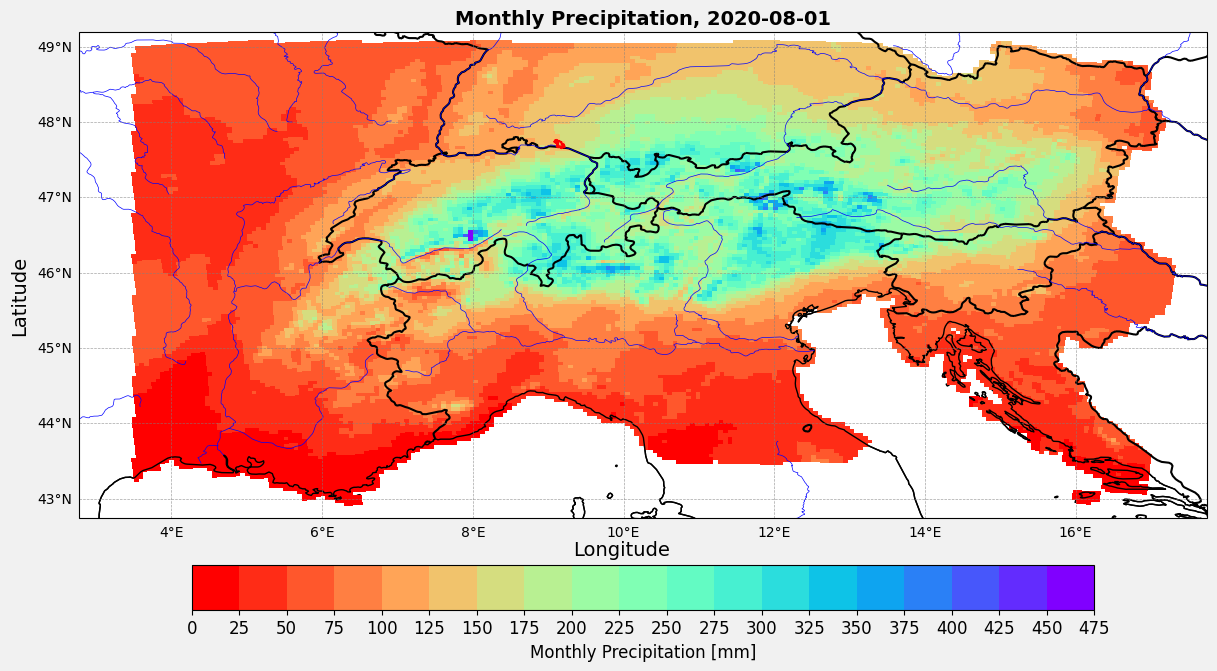

In [31]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd

def main_plt_plot(selected_year, selected_month, save):
    # File paths and variable names
    prec1871 = os.path.join(working_folder, 'LAPrec1871.v1.2.nc')
    variable_name = 'LAPrec1871'

    # Open the NetCDF dataset
    nc_dataset = nc.Dataset(prec1871, 'r')
    lon = nc_dataset['lon'][:]
    lat = nc_dataset['lat'][:]

    # Extract time variable and convert it to readable dates
    time_var = nc_dataset.variables['time']
    time_units = nc_dataset.variables['time'].units
    time_calendar = getattr(time_var, "calendar", "standard")
    cftime = nc.num2date(time_var[:], units=time_units, calendar=time_calendar)

    # Extract data for selected date
    selected_date = f"{selected_year}-{selected_month}-01"
    target_index = np.where([t.strftime('%Y-%m-%d') == selected_date for t in cftime])[0][0]
    index_data = nc_dataset[variable_name][target_index, :, :]
    
    # Calculate vmin, vmax and bins
    vmin = (np.nanmin(index_data)//25*25)
    vmax = ((np.nanmax(index_data)+25)//25*25)
    interval = 25
    bins = int((vmax-vmin)/interval)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8),
                           facecolor='#f1f1f1',
                           edgecolor='k',
                           subplot_kw={'projection': ccrs.PlateCarree()})

    cmap = plt.get_cmap("rainbow_r", bins)
    pcm = ax.pcolormesh(lon,
                        lat,
                        index_data,
                        cmap=cmap,
                        shading="auto",
                        vmin=vmin,
                        vmax=vmax)

    # Add Konstanz Shapefile
    konstanz_shp = r".\shapefiles\kn_boundary.shp"
    konstanz_boundary = gpd.read_file(konstanz_shp)
    konstanz_boundary = konstanz_boundary.to_crs(4326)
    konstanz_boundary.boundary.plot(ax=ax, edgecolor='red')

    # Add a colorbar
    ticks = np.linspace(vmin, vmax, num=bins + 1)
    cbar = plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.06, shrink=0.8, ticks=ticks)
    cbar.set_label("Monthly Precipitation [mm]", fontsize=12)
    cbar.ax.tick_params(labelsize=12)

    # Add features
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
    ax.add_feature(cfeature.RIVERS, linewidth=0.5, edgecolor='blue')

    # Add grid lines
    gl = ax.gridlines(draw_labels=True,
                      crs=ccrs.PlateCarree(),
                      linewidth=0.5,
                      color='gray',
                      alpha=0.7,
                      linestyle='--')
    gl.top_labels = False 
    gl.right_labels = False
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    # Add title
    fig.text(0.5, 0.175, 'Longitude', ha='center', fontsize=14)
    fig.text(-0.01, 0.5, 'Latitude', va='center', rotation='vertical', fontsize=14)
    ax.set_title(f"Monthly Precipitation, {selected_date}", fontsize=14, fontweight='bold')
    ax.set_aspect("equal")

    # Show plot
    plt.tight_layout()
    if save:
        temp_images_folder = os.path.join(output_folder,"temp_images_folder")
        os.makedirs(temp_images_folder, exist_ok=True)
        
        image_filepath = os.path.join(temp_images_folder,f"{selected_year}-{selected_month}")
        plt.savefig(f"{image_filepath}.png", format='png', bbox_inches='tight')
    plt.show()


# Extract data for selected year and month
selected_year = '2020'
selected_month = '08'

if __name__ == "__main__":
    main_plt_plot(selected_year, selected_month, save=True)

## 3. Read NetCDF4 file using **xarray**

In [32]:
test_nc = os.path.join(working_folder, 'LAPrec1871.v1.2.nc')

import netCDF4 as nc
import xarray as xr

nc_file = xr.open_dataset(test_nc)
nc_file

<xarray.Dataset> Size: 109MB
Dimensions:                       (X: 219, Y: 138, time: 1800)
Coordinates:
  * X                             (X) float64 2kB 3.795e+06 ... 4.885e+06
  * Y                             (Y) float64 1kB 2.21e+06 ... 2.895e+06
  * time                          (time) datetime64[ns] 14kB 1871-01-01 ... 2...
Data variables:
    LAPrec1871                    (time, Y, X) int16 109MB ...
    lon                           (Y, X) float32 121kB ...
    lat                           (Y, X) float32 121kB ...
    dem                           (Y, X) float64 242kB ...
    lambert_azimuthal_equal_area  |S1 1B ...
Attributes:
    title:          LAPrec - Long-term Alpine precipitation reconstruction
    institution:    MeteoSwiss, Zurich, Switzerland; ZAMG, Vienna, Austria
    source:         surface observation
    reference:      (document coming soon)
    contact:        copernicus-support@ecmwf.int
    comment:        Due to pending updates of input data, the precipitation f...
    Conventions:    CF-1.6
    creation_date:  2023-02-10 14:04:25

### Plot selected month + year data

In [33]:
import pandas as pd
lon_list = nc_file['lon'].values.tolist()
lat_list = nc_file['lat'].values.tolist()
time_data = pd.to_datetime(nc_file['time'].values)

variable = "LAPrec1871"

year = "2020"
month = "08"
selected_date = f'{year}-{month}-01'

f:\OneDrive - str.ucture GmbH\General\CoKLIMAx (Phase 2)\CoKLIMAx-II\myenv\lib\site-packages\xarray\coding\variables.py:486: RuntimeWarning: invalid value encountered in cast
  data = data.astype(dtype=dtype, copy=True)


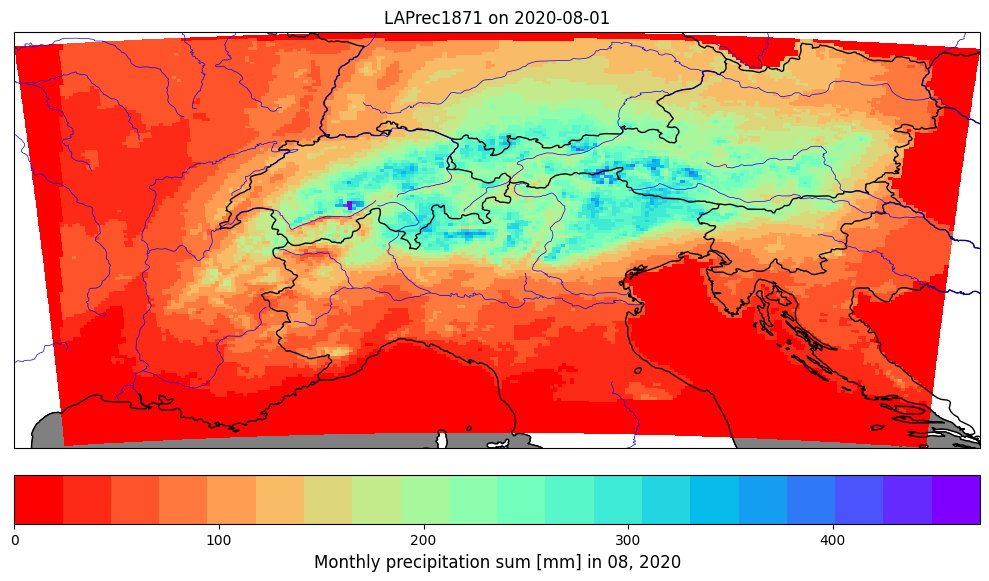

In [34]:
import matplotlib.pyplot as plt
import cartopy as ctp
import cartopy.feature as cfeature
import cartopy.crs as ccrs

data_on_date = nc_file[variable].sel(time=selected_date)
# data_on_date = data_on_date.where(~data_on_date.isnull(), 0)

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# ax = axs[0]
cmap = plt.get_cmap("rainbow_r", 20)
pcm = ax.pcolormesh(lon_list, lat_list, data_on_date, cmap=cmap, shading="auto")

cbar = plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label(f"Monthly precipitation sum [mm] in {month}, {year}", fontsize=12)
cbar.ax.tick_params(labelsize=10)

ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, linewidth=0.5, edgecolor='blue')
ax.add_feature(ctp.feature.OCEAN, facecolor=(0.5, 0.5, 0.5))

ax.set_title(f"{variable} on {selected_date}")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect(1)

plt.tight_layout()
plt.show()

### Read with xarray and export geotiff

In [35]:
# import rasterio
# from rasterio.transform import from_origin
# import netCDF4 as nc
# import xarray as xr
# import numpy as np

# prec1871 = os.path.join(working_folder, 'LAPrec1871.v1.2.nc')
# variable_name = 'LAPrec1871'
# output_filename = variable_name

# # read
# nc_file = xr.open_dataset(prec1871)

# time_list = nc_file.time.values

# x = nc_file['X'].values
# y = nc_file['Y'].values
# dx = abs(x[1] - x[0])
# dy = abs(y[1] - y[0])

# transform = from_origin(x.min() - dx / 2, y.max() + dy / 2, dx, dy)

# time_index = 0
# timestamp = time_list[time_index]

# precipitation_data = nc_file[variable_name][:].isel(time=time_index).values
# precipitation_data_corrected = np.flipud(precipitation_data)

# date_str = str(timestamp)[:10]

# output_file = r"G:/ppt_with_xarray.tif"

# with rasterio.open(
#     output_file,
#     "w",
#     driver="GTiff",
#     height=precipitation_data_corrected.shape[0],
#     width=precipitation_data_corrected.shape[1],
#     count=1,
#     dtype=precipitation_data_corrected.dtype,
#     crs="EPSG:3035", # Lambert Azimuthal Equal-Area projection (ETRS89) to epsg
#     nodata=-9999,
#     transform=transform,
# ) as dst:
#     dst.write(precipitation_data_corrected, 1)